In [2]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt

In [3]:
dataset = load_boston() #加载数据集
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]

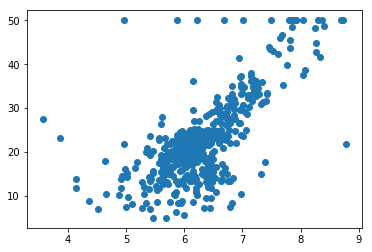

In [4]:
plt.scatter(X_rm,y)

### Gradient descent

### Assume that the target funciton is a linear function
$$ y = k*rm + b$$

In [5]:
#define target function
def price(rm, k, b):
    return k * rm + b

### Define mean square loss

$$ loss = \frac{1}{n} \sum{\mid y_i - \hat{y_i}\mid}$$

$$ loss = \frac{1}{n} \sum{\mid y_i - (kx_i + b_i) \mid}$$

In [6]:
# define loss function 
def loss(y,y_hat):
    s=0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        if y_i > y_hat_i:
            s += (y_i - y_hat_i)
        if y_i < y_hat_i:
            s += (y_hat_i - y_i)
    return s/len(list(y))

### Define partial derivatives

$$ y > \hat y $$
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}\sum x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -1$$

$$ y < \hat y $$
$$ \frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = 1 $$

In [7]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i>y_hat_i:
            gradient += x_i
        else:
            gradient += x_i*(-1)
    return -1/n * gradient

    
def partial_derivative_b(y, y_hat):
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i>y_hat_i:
            return -1
        else:
            return 1

In [19]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 6000 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 169.01749663487325, parameters k is -10.506036348954083 and b is -80.458092997358
Iteration 1, the loss is 168.9770000054905, parameters k is -10.499751714566731 and b is -80.45709299735799
Iteration 2, the loss is 168.93650337610785, parameters k is -10.493467080179379 and b is -80.45609299735798
Iteration 3, the loss is 168.89600674672522, parameters k is -10.487182445792026 and b is -80.45509299735798
Iteration 4, the loss is 168.85551011734265, parameters k is -10.480897811404674 and b is -80.45409299735798
Iteration 5, the loss is 168.81501348795993, parameters k is -10.474613177017321 and b is -80.45309299735797
Iteration 6, the loss is 168.77451685857716, parameters k is -10.468328542629969 and b is -80.45209299735797
Iteration 7, the loss is 168.73402022919421, parameters k is -10.462043908242617 and b is -80.45109299735796
Iteration 8, the loss is 168.69352359981164, parameters k is -10.455759273855264 and b is -80.45009299735796
Iteration 9, the loss 

Iteration 182, the loss is 161.64711008722296, parameters k is -9.36223289045595 and b is -80.27609299735713
Iteration 183, the loss is 161.60661345784038, parameters k is -9.355948256068597 and b is -80.27509299735712
Iteration 184, the loss is 161.56611682845784, parameters k is -9.349663621681245 and b is -80.27409299735712
Iteration 185, the loss is 161.5256201990751, parameters k is -9.343378987293892 and b is -80.27309299735711
Iteration 186, the loss is 161.48512356969226, parameters k is -9.33709435290654 and b is -80.2720929973571
Iteration 187, the loss is 161.44462694030958, parameters k is -9.330809718519188 and b is -80.2710929973571
Iteration 188, the loss is 161.40413031092658, parameters k is -9.324525084131835 and b is -80.2700929973571
Iteration 189, the loss is 161.36363368154417, parameters k is -9.318240449744483 and b is -80.26909299735709
Iteration 190, the loss is 161.32313705216166, parameters k is -9.31195581535713 and b is -80.26809299735709
Iteration 191, th

Iteration 349, the loss is 154.88417298031322, parameters k is -8.312698947768101 and b is -80.10909299735633
Iteration 350, the loss is 154.84367635093065, parameters k is -8.306414313380749 and b is -80.10809299735632
Iteration 351, the loss is 154.8031797215479, parameters k is -8.300129678993397 and b is -80.10709299735632
Iteration 352, the loss is 154.7626830921652, parameters k is -8.293845044606044 and b is -80.10609299735631
Iteration 353, the loss is 154.7221864627828, parameters k is -8.287560410218692 and b is -80.10509299735631
Iteration 354, the loss is 154.68168983340001, parameters k is -8.28127577583134 and b is -80.1040929973563
Iteration 355, the loss is 154.64119320401713, parameters k is -8.274991141443987 and b is -80.1030929973563
Iteration 356, the loss is 154.6006965746345, parameters k is -8.268706507056635 and b is -80.1020929973563
Iteration 357, the loss is 154.5601999452519, parameters k is -8.262421872669282 and b is -80.10109299735629
Iteration 358, the 

Iteration 464, the loss is 150.2270606013041, parameters k is -7.589965993222636 and b is -79.99409299735578
Iteration 465, the loss is 150.18656397192123, parameters k is -7.5836813588352845 and b is -79.99309299735577
Iteration 466, the loss is 150.1460673425385, parameters k is -7.577396724447933 and b is -79.99209299735577
Iteration 467, the loss is 150.10557071315594, parameters k is -7.5711120900605815 and b is -79.99109299735576
Iteration 468, the loss is 150.0650740837732, parameters k is -7.56482745567323 and b is -79.99009299735576
Iteration 469, the loss is 150.02457745439057, parameters k is -7.5585428212858785 and b is -79.98909299735575
Iteration 470, the loss is 149.98408082500782, parameters k is -7.552258186898527 and b is -79.98809299735575
Iteration 471, the loss is 149.9435841956251, parameters k is -7.5459735525111755 and b is -79.98709299735575
Iteration 472, the loss is 149.90308756624273, parameters k is -7.539688918123824 and b is -79.98609299735574
Iteration 4

Iteration 614, the loss is 144.15256619390095, parameters k is -6.647270835119912 and b is -79.84409299735506
Iteration 615, the loss is 144.11206956451824, parameters k is -6.64098620073256 and b is -79.84309299735506
Iteration 616, the loss is 144.07157293513546, parameters k is -6.634701566345209 and b is -79.84209299735505
Iteration 617, the loss is 144.03107630575292, parameters k is -6.628416931957857 and b is -79.84109299735505
Iteration 618, the loss is 143.99057967637023, parameters k is -6.622132297570506 and b is -79.84009299735504
Iteration 619, the loss is 143.95008304698732, parameters k is -6.615847663183154 and b is -79.83909299735504
Iteration 620, the loss is 143.90958641760474, parameters k is -6.609563028795803 and b is -79.83809299735503
Iteration 621, the loss is 143.86908978822208, parameters k is -6.603278394408451 and b is -79.83709299735503
Iteration 622, the loss is 143.82859315883925, parameters k is -6.5969937600211 and b is -79.83609299735502
Iteration 623

Iteration 751, the loss is 138.6045279684726, parameters k is -5.786275924052757 and b is -79.70709299735441
Iteration 752, the loss is 138.5640313390902, parameters k is -5.779991289665405 and b is -79.7060929973544
Iteration 753, the loss is 138.52353470970712, parameters k is -5.773706655278054 and b is -79.7050929973544
Iteration 754, the loss is 138.48303808032472, parameters k is -5.767422020890702 and b is -79.7040929973544
Iteration 755, the loss is 138.4425414509419, parameters k is -5.761137386503351 and b is -79.70309299735439
Iteration 756, the loss is 138.40204482155949, parameters k is -5.754852752115999 and b is -79.70209299735438
Iteration 757, the loss is 138.3615481921765, parameters k is -5.748568117728648 and b is -79.70109299735438
Iteration 758, the loss is 138.32105156279388, parameters k is -5.742283483341296 and b is -79.70009299735437
Iteration 759, the loss is 138.28055493341125, parameters k is -5.735998848953945 and b is -79.69909299735437
Iteration 760, th

Iteration 905, the loss is 132.36804704353872, parameters k is -4.8184422284006265 and b is -79.55309299735367
Iteration 906, the loss is 132.3275504141562, parameters k is -4.812157594013275 and b is -79.55209299735367
Iteration 907, the loss is 132.2870537847734, parameters k is -4.8058729596259235 and b is -79.55109299735366
Iteration 908, the loss is 132.24655715539092, parameters k is -4.799588325238572 and b is -79.55009299735366
Iteration 909, the loss is 132.2060605260079, parameters k is -4.7933036908512205 and b is -79.54909299735365
Iteration 910, the loss is 132.16556389662549, parameters k is -4.787019056463869 and b is -79.54809299735365
Iteration 911, the loss is 132.12506726724266, parameters k is -4.7807344220765176 and b is -79.54709299735364
Iteration 912, the loss is 132.08457063786017, parameters k is -4.774449787689166 and b is -79.54609299735364
Iteration 913, the loss is 132.04407400847745, parameters k is -4.768165153301815 and b is -79.54509299735363
Iteration

Iteration 1029, the loss is 127.34646500008559, parameters k is -4.039147564369041 and b is -79.42909299735308
Iteration 1030, the loss is 127.30596837070298, parameters k is -4.03286292998169 and b is -79.42809299735308
Iteration 1031, the loss is 127.26547174132023, parameters k is -4.026578295594338 and b is -79.42709299735307
Iteration 1032, the loss is 127.22497511193757, parameters k is -4.020293661206987 and b is -79.42609299735307
Iteration 1033, the loss is 127.18447848255492, parameters k is -4.014009026819635 and b is -79.42509299735306
Iteration 1034, the loss is 127.14398185317226, parameters k is -4.007724392432284 and b is -79.42409299735306
Iteration 1035, the loss is 127.10348522378955, parameters k is -4.001439758044932 and b is -79.42309299735305
Iteration 1036, the loss is 127.06298859440668, parameters k is -3.99515512365758 and b is -79.42209299735305
Iteration 1037, the loss is 127.02249196502403, parameters k is -3.9888704892702282 and b is -79.42109299735304
It

Iteration 1197, the loss is 120.54303126379354, parameters k is -2.983328987293918 and b is -79.26109299735228
Iteration 1198, the loss is 120.50253463441105, parameters k is -2.977044352906566 and b is -79.26009299735227
Iteration 1199, the loss is 120.46203800502829, parameters k is -2.970759718519214 and b is -79.25909299735227
Iteration 1200, the loss is 120.42154137564546, parameters k is -2.964475084131862 and b is -79.25809299735226
Iteration 1201, the loss is 120.38104474626276, parameters k is -2.95819044974451 and b is -79.25709299735226
Iteration 1202, the loss is 120.34054811688016, parameters k is -2.9519058153571582 and b is -79.25609299735225
Iteration 1203, the loss is 120.30005148749757, parameters k is -2.9456211809698063 and b is -79.25509299735225
Iteration 1204, the loss is 120.25955485811487, parameters k is -2.9393365465824544 and b is -79.25409299735225
Iteration 1205, the loss is 120.2190582287322, parameters k is -2.9330519121951024 and b is -79.25309299735224

Iteration 1360, the loss is 113.94208067441512, parameters k is -1.9589335821555534 and b is -79.0980929973515
Iteration 1361, the loss is 113.90158404503244, parameters k is -1.9526489477682016 and b is -79.0970929973515
Iteration 1362, the loss is 113.86108741564975, parameters k is -1.94636431338085 and b is -79.09609299735149
Iteration 1363, the loss is 113.82059078626712, parameters k is -1.9400796789934982 and b is -79.09509299735149
Iteration 1364, the loss is 113.78009415688435, parameters k is -1.9337950446061465 and b is -79.09409299735148
Iteration 1365, the loss is 113.73959752750164, parameters k is -1.9275104102187948 and b is -79.09309299735148
Iteration 1366, the loss is 113.69910089811911, parameters k is -1.921225775831443 and b is -79.09209299735147
Iteration 1367, the loss is 113.65860426873631, parameters k is -1.9149411414440913 and b is -79.09109299735147
Iteration 1368, the loss is 113.61810763935362, parameters k is -1.9086565070567396 and b is -79.090092997351

Iteration 1512, the loss is 107.78659300824648, parameters k is -1.0036691552780923 and b is -78.94609299735077
Iteration 1513, the loss is 107.74609637886381, parameters k is -0.9973845208907405 and b is -78.94509299735077
Iteration 1514, the loss is 107.70559974948104, parameters k is -0.9910998865033886 and b is -78.94409299735077
Iteration 1515, the loss is 107.66510312009842, parameters k is -0.9848152521160368 and b is -78.94309299735076
Iteration 1516, the loss is 107.62460649071568, parameters k is -0.978530617728685 and b is -78.94209299735076
Iteration 1517, the loss is 107.58410986133296, parameters k is -0.9722459833413332 and b is -78.94109299735075
Iteration 1518, the loss is 107.54361323195023, parameters k is -0.9659613489539813 and b is -78.94009299735075
Iteration 1519, the loss is 107.50311660256769, parameters k is -0.9596767145666295 and b is -78.93909299735074
Iteration 1520, the loss is 107.46261997318493, parameters k is -0.9533920801792777 and b is -78.93809299

Iteration 1669, the loss is 101.42862219516414, parameters k is -0.016981556463859265 and b is -78.78909299735002
Iteration 1670, the loss is 101.38812556578158, parameters k is -0.010696922076507479 and b is -78.78809299735002
Iteration 1671, the loss is 101.34762893639893, parameters k is -0.004412287689155692 and b is -78.78709299735002
Iteration 1672, the loss is 101.30713230701612, parameters k is 0.0018723466981960951 and b is -78.78609299735001
Iteration 1673, the loss is 101.26663567763343, parameters k is 0.008156981085547882 and b is -78.78509299735
Iteration 1674, the loss is 101.22613904825077, parameters k is 0.014441615472899669 and b is -78.78409299735
Iteration 1675, the loss is 101.185642418868, parameters k is 0.020726249860251456 and b is -78.78309299735
Iteration 1676, the loss is 101.14514578948537, parameters k is 0.027010884247603242 and b is -78.78209299734999
Iteration 1677, the loss is 101.10464916010257, parameters k is 0.03329551863495503 and b is -78.781092

Iteration 1860, the loss is 93.69376598307058, parameters k is 1.1833836115203324 and b is -78.59809299734911
Iteration 1861, the loss is 93.65326935368795, parameters k is 1.1896682459076842 and b is -78.59709299734911
Iteration 1862, the loss is 93.61277272430519, parameters k is 1.1959528802950359 and b is -78.5960929973491
Iteration 1863, the loss is 93.57227609492254, parameters k is 1.2022375146823876 and b is -78.5950929973491
Iteration 1864, the loss is 93.5317794655398, parameters k is 1.2085221490697393 and b is -78.5940929973491
Iteration 1865, the loss is 93.49128283615713, parameters k is 1.214806783457091 and b is -78.59309299734909
Iteration 1866, the loss is 93.4507862067744, parameters k is 1.2210914178444428 and b is -78.59209299734908
Iteration 1867, the loss is 93.41028957739168, parameters k is 1.2273760522317945 and b is -78.59109299734908
Iteration 1868, the loss is 93.36979294800896, parameters k is 1.2336606866191462 and b is -78.59009299734907
Iteration 1869, 

Iteration 2058, the loss is 85.67543336529813, parameters k is 2.427741220215988 and b is -78.40009299734817
Iteration 2059, the loss is 85.6349367359154, parameters k is 2.4340258546033398 and b is -78.39909299734816
Iteration 2060, the loss is 85.59444010653269, parameters k is 2.4403104889906917 and b is -78.39809299734816
Iteration 2061, the loss is 85.55394347714999, parameters k is 2.4465951233780436 and b is -78.39709299734815
Iteration 2062, the loss is 85.51344684776731, parameters k is 2.4528797577653956 and b is -78.39609299734815
Iteration 2063, the loss is 85.47295021838458, parameters k is 2.4591643921527475 and b is -78.39509299734814
Iteration 2064, the loss is 85.4324535890019, parameters k is 2.4654490265400995 and b is -78.39409299734814
Iteration 2065, the loss is 85.39195695961916, parameters k is 2.4717336609274514 and b is -78.39309299734813
Iteration 2066, the loss is 85.35146033023646, parameters k is 2.4780182953148033 and b is -78.39209299734813
Iteration 206

Iteration 2232, the loss is 78.62901985270994, parameters k is 3.5212676036152253 and b is -78.22609299734734
Iteration 2233, the loss is 78.58852322332734, parameters k is 3.5275522380025772 and b is -78.22509299734733
Iteration 2234, the loss is 78.54802659394467, parameters k is 3.533836872389929 and b is -78.22409299734733
Iteration 2235, the loss is 78.50752996456177, parameters k is 3.540121506777281 and b is -78.22309299734732
Iteration 2236, the loss is 78.46703333517924, parameters k is 3.546406141164633 and b is -78.22209299734732
Iteration 2237, the loss is 78.4265367057965, parameters k is 3.552690775551985 and b is -78.22109299734731
Iteration 2238, the loss is 78.3860400764139, parameters k is 3.558975409939337 and b is -78.22009299734731
Iteration 2239, the loss is 78.3455434470312, parameters k is 3.565260044326689 and b is -78.2190929973473
Iteration 2240, the loss is 78.30504681764835, parameters k is 3.571544678714041 and b is -78.2180929973473
Iteration 2241, the lo

Iteration 2394, the loss is 72.06856589271435, parameters k is 4.539378374366201 and b is -78.06409299734656
Iteration 2395, the loss is 72.02806926333179, parameters k is 4.545663008753553 and b is -78.06309299734656
Iteration 2396, the loss is 71.98757263394899, parameters k is 4.551947643140904 and b is -78.06209299734655
Iteration 2397, the loss is 71.9470760045664, parameters k is 4.558232277528256 and b is -78.06109299734655
Iteration 2398, the loss is 71.90657937518361, parameters k is 4.564516911915607 and b is -78.06009299734654
Iteration 2399, the loss is 71.86608274580097, parameters k is 4.570801546302959 and b is -78.05909299734654
Iteration 2400, the loss is 71.8255861164183, parameters k is 4.57708618069031 and b is -78.05809299734653
Iteration 2401, the loss is 71.78508948703553, parameters k is 4.583370815077662 and b is -78.05709299734653
Iteration 2402, the loss is 71.74459285765296, parameters k is 4.589655449465013 and b is -78.05609299734652
Iteration 2403, the lo

Iteration 2545, the loss is 65.95357485592857, parameters k is 5.488358166856277 and b is -77.91309299734584
Iteration 2546, the loss is 65.91307822654589, parameters k is 5.494642801243629 and b is -77.91209299734584
Iteration 2547, the loss is 65.87258159716316, parameters k is 5.50092743563098 and b is -77.91109299734583
Iteration 2548, the loss is 65.83208496778047, parameters k is 5.507212070018332 and b is -77.91009299734583
Iteration 2549, the loss is 65.79158833839779, parameters k is 5.513496704405683 and b is -77.90909299734582
Iteration 2550, the loss is 65.7510917090152, parameters k is 5.519781338793035 and b is -77.90809299734582
Iteration 2551, the loss is 65.71059507963245, parameters k is 5.526065973180386 and b is -77.90709299734581
Iteration 2552, the loss is 65.67009845024977, parameters k is 5.5323506075677376 and b is -77.90609299734581
Iteration 2553, the loss is 65.62960182086712, parameters k is 5.538635241955089 and b is -77.9050929973458
Iteration 2554, the l

Iteration 2710, the loss is 59.27163100778515, parameters k is 6.525322840769274 and b is -77.74809299734505
Iteration 2711, the loss is 59.23113437840246, parameters k is 6.531607475156625 and b is -77.74709299734505
Iteration 2712, the loss is 59.190637749019785, parameters k is 6.537892109543977 and b is -77.74609299734504
Iteration 2713, the loss is 59.15014111963711, parameters k is 6.544176743931328 and b is -77.74509299734504
Iteration 2714, the loss is 59.10964449025436, parameters k is 6.55046137831868 and b is -77.74409299734504
Iteration 2715, the loss is 59.06914786087169, parameters k is 6.556746012706031 and b is -77.74309299734503
Iteration 2716, the loss is 59.02865123148904, parameters k is 6.563030647093383 and b is -77.74209299734503
Iteration 2717, the loss is 58.98815460210629, parameters k is 6.569315281480734 and b is -77.74109299734502
Iteration 2718, the loss is 58.94765797272365, parameters k is 6.575599915868086 and b is -77.74009299734502
Iteration 2719, the

Iteration 2887, the loss is 52.10372760704947, parameters k is 7.6377031273304885 and b is -77.57109299734421
Iteration 2888, the loss is 52.0632309776668, parameters k is 7.64398776171784 and b is -77.5700929973442
Iteration 2889, the loss is 52.02273434828404, parameters k is 7.6502723961051915 and b is -77.5690929973442
Iteration 2890, the loss is 51.98223771890135, parameters k is 7.656557030492543 and b is -77.5680929973442
Iteration 2891, the loss is 51.94174108951879, parameters k is 7.6628416648798945 and b is -77.56709299734419
Iteration 2892, the loss is 51.90124446013601, parameters k is 7.669126299267246 and b is -77.56609299734419
Iteration 2893, the loss is 51.86074783075344, parameters k is 7.6754109336545975 and b is -77.56509299734418
Iteration 2894, the loss is 51.82025120137061, parameters k is 7.681695568041949 and b is -77.56409299734418
Iteration 2895, the loss is 51.77975457198798, parameters k is 7.6879802024293005 and b is -77.56309299734417
Iteration 2896, the

Iteration 3043, the loss is 45.78625342334964, parameters k is 8.61810609175741 and b is -77.41509299734346
Iteration 3044, the loss is 45.74575679396697, parameters k is 8.624390726144762 and b is -77.41409299734346
Iteration 3045, the loss is 45.705260164584324, parameters k is 8.630675360532114 and b is -77.41309299734345
Iteration 3046, the loss is 45.66476353520163, parameters k is 8.636959994919467 and b is -77.41209299734345
Iteration 3047, the loss is 45.62426690581889, parameters k is 8.64324462930682 and b is -77.41109299734345
Iteration 3048, the loss is 45.58377027643618, parameters k is 8.649529263694172 and b is -77.41009299734344
Iteration 3049, the loss is 45.54327364705349, parameters k is 8.655813898081524 and b is -77.40909299734344
Iteration 3050, the loss is 45.5027770176709, parameters k is 8.662098532468876 and b is -77.40809299734343
Iteration 3051, the loss is 45.462280388288136, parameters k is 8.668383166856229 and b is -77.40709299734343
Iteration 3052, the 

Iteration 3213, the loss is 38.901826428291876, parameters k is 9.686493937607315 and b is -77.24509299734265
Iteration 3214, the loss is 38.86132979890911, parameters k is 9.692778571994667 and b is -77.24409299734265
Iteration 3215, the loss is 38.82083316952647, parameters k is 9.69906320638202 and b is -77.24309299734264
Iteration 3216, the loss is 38.78033654014378, parameters k is 9.705347840769372 and b is -77.24209299734264
Iteration 3217, the loss is 38.739839910761106, parameters k is 9.711632475156724 and b is -77.24109299734263
Iteration 3218, the loss is 38.69934328137841, parameters k is 9.717917109544077 and b is -77.24009299734263
Iteration 3219, the loss is 38.658846651995724, parameters k is 9.72420174393143 and b is -77.23909299734262
Iteration 3220, the loss is 38.61835002261307, parameters k is 9.730486378318782 and b is -77.23809299734262
Iteration 3221, the loss is 38.577853393230285, parameters k is 9.736771012706134 and b is -77.23709299734261
Iteration 3222, t

Iteration 3373, the loss is 32.42236572706097, parameters k is 10.692035439583696 and b is -77.08509299734189
Iteration 3374, the loss is 32.38186909767827, parameters k is 10.698320073971049 and b is -77.08409299734188
Iteration 3375, the loss is 32.341372468295575, parameters k is 10.704604708358401 and b is -77.08309299734188
Iteration 3376, the loss is 32.30087583891291, parameters k is 10.710889342745753 and b is -77.08209299734187
Iteration 3377, the loss is 32.260379209530214, parameters k is 10.717173977133106 and b is -77.08109299734187
Iteration 3378, the loss is 32.21988258014753, parameters k is 10.723458611520458 and b is -77.08009299734186
Iteration 3379, the loss is 32.179385950764825, parameters k is 10.72974324590781 and b is -77.07909299734186
Iteration 3380, the loss is 32.13888932138214, parameters k is 10.736027880295163 and b is -77.07809299734186
Iteration 3381, the loss is 32.09839269199943, parameters k is 10.742312514682515 and b is -77.07709299734185
Iteratio

Iteration 3525, the loss is 26.293666747785792, parameters k is 11.645182949465156 and b is -76.93309299734116
Iteration 3526, the loss is 26.253609064974693, parameters k is 11.651432880295195 and b is -76.93209299734116
Iteration 3527, the loss is 26.213551382163615, parameters k is 11.657682811125234 and b is -76.93109299734115
Iteration 3528, the loss is 26.173493699352463, parameters k is 11.663932741955273 and b is -76.93009299734115
Iteration 3529, the loss is 26.133436016541395, parameters k is 11.670182672785312 and b is -76.92909299734114
Iteration 3530, the loss is 26.093378333730236, parameters k is 11.676432603615352 and b is -76.92809299734114
Iteration 3531, the loss is 26.05332065091919, parameters k is 11.68268253444539 and b is -76.92709299734113
Iteration 3532, the loss is 26.01326296810806, parameters k is 11.68893246527543 and b is -76.92609299734113
Iteration 3533, the loss is 25.97320528529692, parameters k is 11.69518239610547 and b is -76.92509299734112
Iterati

Iteration 3666, the loss is 20.65330198956505, parameters k is 12.525831726144967 and b is -76.79209299734049
Iteration 3667, the loss is 20.61426604221986, parameters k is 12.532000336816903 and b is -76.79109299734048
Iteration 3668, the loss is 20.57523009487458, parameters k is 12.53816894748884 and b is -76.79009299734048
Iteration 3669, the loss is 20.536194147529315, parameters k is 12.544337558160777 and b is -76.78909299734048
Iteration 3670, the loss is 20.497158200184067, parameters k is 12.550506168832714 and b is -76.78809299734047
Iteration 3671, the loss is 20.45827984044822, parameters k is 12.55667477950465 and b is -76.78709299734047
Iteration 3672, the loss is 20.419603619254772, parameters k is 12.562814485038247 and b is -76.78609299734046
Iteration 3673, the loss is 20.38092739806132, parameters k is 12.568954190571844 and b is -76.78509299734046
Iteration 3674, the loss is 20.342251176867897, parameters k is 12.575093896105441 and b is -76.78409299734045
Iteratio

Iteration 3831, the loss is 14.412090168985143, parameters k is 13.527543720216098 and b is -76.6270929973397
Iteration 3832, the loss is 14.376302219134637, parameters k is 13.5334465403742 and b is -76.6260929973397
Iteration 3833, the loss is 14.340514269284114, parameters k is 13.539349360532302 and b is -76.62509299733969
Iteration 3834, the loss is 14.304726319433584, parameters k is 13.545252180690404 and b is -76.62409299733969
Iteration 3835, the loss is 14.268938369583042, parameters k is 13.551155000848507 and b is -76.62309299733968
Iteration 3836, the loss is 14.233150419732533, parameters k is 13.557057821006609 and b is -76.62209299733968
Iteration 3837, the loss is 14.197362469882004, parameters k is 13.562960641164711 and b is -76.62109299733967
Iteration 3838, the loss is 14.161574520031483, parameters k is 13.568863461322813 and b is -76.62009299733967
Iteration 3839, the loss is 14.125786570180964, parameters k is 13.574766281480915 and b is -76.61909299733966
Itera

Iteration 3986, the loss is 9.505736512110802, parameters k is 14.386528105591603 and b is -76.47209299733896
Iteration 3987, the loss is 9.480554725413812, parameters k is 14.391475589781326 and b is -76.47109299733896
Iteration 3988, the loss is 9.455554734101563, parameters k is 14.39639550084852 and b is -76.47009299733895
Iteration 3989, the loss is 9.430554742789294, parameters k is 14.401315411915714 and b is -76.46909299733895
Iteration 3990, the loss is 9.40555475147704, parameters k is 14.406235322982909 and b is -76.46809299733894
Iteration 3991, the loss is 9.380707415197204, parameters k is 14.411155234050103 and b is -76.46709299733894
Iteration 3992, the loss is 9.356209285608973, parameters k is 14.416024686619274 and b is -76.46609299733893
Iteration 3993, the loss is 9.33171115602075, parameters k is 14.420894139188444 and b is -76.46509299733893
Iteration 3994, the loss is 9.307213026432528, parameters k is 14.425763591757615 and b is -76.46409299733892
Iteration 399

Iteration 4160, the loss is 6.493216874698185, parameters k is 15.090299149069878 and b is -76.29809299733813
Iteration 4161, the loss is 6.483474785450412, parameters k is 15.093336953417705 and b is -76.29709299733813
Iteration 4162, the loss is 6.473732696202647, parameters k is 15.096374757765531 and b is -76.29609299733812
Iteration 4163, the loss is 6.463990606954881, parameters k is 15.099412562113358 and b is -76.29509299733812
Iteration 4164, the loss is 6.4542485177071045, parameters k is 15.102450366461184 and b is -76.29409299733811
Iteration 4165, the loss is 6.444506428459334, parameters k is 15.10548817080901 and b is -76.2930929973381
Iteration 4166, the loss is 6.434795646404372, parameters k is 15.108525975156837 and b is -76.2920929973381
Iteration 4167, the loss is 6.4252544928039965, parameters k is 15.111531182666718 and b is -76.2910929973381
Iteration 4168, the loss is 6.415713339203627, parameters k is 15.1145363901766 and b is -76.29009299733809
Iteration 4169

Iteration 4307, the loss is 5.704785036288717, parameters k is 15.42573254630308 and b is -76.3330929973383
Iteration 4308, the loss is 5.7025921616948345, parameters k is 15.427309050255648 and b is -76.3340929973383
Iteration 4309, the loss is 5.700399287100951, parameters k is 15.428885554208216 and b is -76.33509299733831
Iteration 4310, the loss is 5.698206412507057, parameters k is 15.430462058160785 and b is -76.33609299733831
Iteration 4311, the loss is 5.696013537913172, parameters k is 15.432038562113354 and b is -76.33709299733832
Iteration 4312, the loss is 5.693820663319289, parameters k is 15.433615066065922 and b is -76.33809299733832
Iteration 4313, the loss is 5.691627788725401, parameters k is 15.43519157001849 and b is -76.33909299733833
Iteration 4314, the loss is 5.689469090915439, parameters k is 15.43676807397106 and b is -76.34009299733833
Iteration 4315, the loss is 5.687430190225596, parameters k is 15.438292372390032 and b is -76.34109299733834
Iteration 4316

Iteration 4453, the loss is 5.51250748442044, parameters k is 15.605819629307035 and b is -76.479092997339
Iteration 4454, the loss is 5.511919936532795, parameters k is 15.60669901468253 and b is -76.480092997339
Iteration 4455, the loss is 5.5113427271582625, parameters k is 15.607578400058024 and b is -76.481092997339
Iteration 4456, the loss is 5.510793300659546, parameters k is 15.608433528516523 and b is -76.48209299733901
Iteration 4457, the loss is 5.5102580784384685, parameters k is 15.609288656975021 and b is -76.48309299733901
Iteration 4458, the loss is 5.509755237526937, parameters k is 15.610113706382135 and b is -76.48409299733902
Iteration 4459, the loss is 5.50926670415608, parameters k is 15.610938755789249 and b is -76.48509299733902
Iteration 4460, the loss is 5.508832502521126, parameters k is 15.611716034445376 and b is -76.48609299733903
Iteration 4461, the loss is 5.5083983008861575, parameters k is 15.612493313101503 and b is -76.48709299733903
Iteration 4462, 

Iteration 4596, the loss is 5.48021560083506, parameters k is 15.691146279504643 and b is -76.62209299733968
Iteration 4597, the loss is 5.480126009339237, parameters k is 15.691602534445355 and b is -76.62309299733968
Iteration 4598, the loss is 5.480036417843407, parameters k is 15.692058789386067 and b is -76.62409299733969
Iteration 4599, the loss is 5.479946826347585, parameters k is 15.692515044326779 and b is -76.62509299733969
Iteration 4600, the loss is 5.4798572348517665, parameters k is 15.69297129926749 and b is -76.6260929973397
Iteration 4601, the loss is 5.4797715538567875, parameters k is 15.693427554208203 and b is -76.6270929973397
Iteration 4602, the loss is 5.479700429287424, parameters k is 15.69385854037421 and b is -76.6280929973397
Iteration 4603, the loss is 5.479629304718066, parameters k is 15.694289526540217 and b is -76.62909299733971
Iteration 4604, the loss is 5.479558180148701, parameters k is 15.694720512706224 and b is -76.63009299733972
Iteration 4605

Iteration 4735, the loss is 5.478169588520332, parameters k is 15.73772964511729 and b is -76.76109299734034
Iteration 4736, the loss is 5.478193862102085, parameters k is 15.737980010729938 and b is -76.76209299734035
Iteration 4737, the loss is 5.478218135683826, parameters k is 15.738230376342587 and b is -76.76309299734035
Iteration 4738, the loss is 5.478242409265565, parameters k is 15.738480741955236 and b is -76.76409299734036
Iteration 4739, the loss is 5.4782666828473054, parameters k is 15.738731107567885 and b is -76.76509299734036
Iteration 4740, the loss is 5.478290956429053, parameters k is 15.738981473180534 and b is -76.76609299734037
Iteration 4741, the loss is 5.478315230010798, parameters k is 15.739231838793183 and b is -76.76709299734037
Iteration 4742, the loss is 5.478339503592535, parameters k is 15.739482204405832 and b is -76.76809299734037
Iteration 4743, the loss is 5.4783637771742795, parameters k is 15.73973257001848 and b is -76.76909299734038
Iteration 

Iteration 4886, the loss is 5.483648133677751, parameters k is 15.769489639188375 and b is -76.91209299734106
Iteration 4887, the loss is 5.48368826619299, parameters k is 15.769686917844501 and b is -76.91309299734107
Iteration 4888, the loss is 5.483728398708226, parameters k is 15.769884196500627 and b is -76.91409299734107
Iteration 4889, the loss is 5.483768531223468, parameters k is 15.770081475156752 and b is -76.91509299734108
Iteration 4890, the loss is 5.4838086637386985, parameters k is 15.770278753812878 and b is -76.91609299734108
Iteration 4891, the loss is 5.483848796253933, parameters k is 15.770476032469004 and b is -76.91709299734109
Iteration 4892, the loss is 5.483888928769166, parameters k is 15.77067331112513 and b is -76.91809299734109
Iteration 4893, the loss is 5.483929061284406, parameters k is 15.770870589781255 and b is -76.9190929973411
Iteration 4894, the loss is 5.48396919379964, parameters k is 15.771067868437381 and b is -76.9200929973411
Iteration 4895

Iteration 5025, the loss is 5.489226553295646, parameters k is 15.796911372389852 and b is -77.05109299734173
Iteration 5026, the loss is 5.489266685810886, parameters k is 15.797108651045978 and b is -77.05209299734173
Iteration 5027, the loss is 5.489306818326122, parameters k is 15.797305929702103 and b is -77.05309299734174
Iteration 5028, the loss is 5.489346950841358, parameters k is 15.79750320835823 and b is -77.05409299734174
Iteration 5029, the loss is 5.489387083356592, parameters k is 15.797700487014355 and b is -77.05509299734175
Iteration 5030, the loss is 5.489427215871826, parameters k is 15.79789776567048 and b is -77.05609299734175
Iteration 5031, the loss is 5.489467348387066, parameters k is 15.798095044326606 and b is -77.05709299734175
Iteration 5032, the loss is 5.489507480902302, parameters k is 15.798292322982732 and b is -77.05809299734176
Iteration 5033, the loss is 5.489547613417542, parameters k is 15.798489601638858 and b is -77.05909299734176
Iteration 50

Iteration 5198, the loss is 5.496589055091208, parameters k is 15.829070848674426 and b is -77.22409299734255
Iteration 5199, the loss is 5.496634561066833, parameters k is 15.829242874366127 and b is -77.22509299734256
Iteration 5200, the loss is 5.496680067042459, parameters k is 15.829414900057827 and b is -77.22609299734256
Iteration 5201, the loss is 5.496725573018086, parameters k is 15.829586925749528 and b is -77.22709299734257
Iteration 5202, the loss is 5.496771078993711, parameters k is 15.829758951441228 and b is -77.22809299734257
Iteration 5203, the loss is 5.496816584969331, parameters k is 15.829930977132928 and b is -77.22909299734258
Iteration 5204, the loss is 5.496862090944951, parameters k is 15.830103002824629 and b is -77.23009299734258
Iteration 5205, the loss is 5.496907596920576, parameters k is 15.83027502851633 and b is -77.23109299734259
Iteration 5206, the loss is 5.496953102896204, parameters k is 15.83044705420803 and b is -77.23209299734259
Iteration 52

Iteration 5355, the loss is 5.50439248155664, parameters k is 15.85242268069034 and b is -77.3810929973433
Iteration 5356, the loss is 5.504443175808756, parameters k is 15.852566334840539 and b is -77.3820929973433
Iteration 5357, the loss is 5.504489873323872, parameters k is 15.852735241955163 and b is -77.38309299734331
Iteration 5358, the loss is 5.504540579615833, parameters k is 15.852878896105361 and b is -77.38409299734332
Iteration 5359, the loss is 5.504587265091114, parameters k is 15.853047803219985 and b is -77.38509299734332
Iteration 5360, the loss is 5.504637983422906, parameters k is 15.853191457370183 and b is -77.38609299734333
Iteration 5361, the loss is 5.504684656858348, parameters k is 15.853360364484807 and b is -77.38709299734333
Iteration 5362, the loss is 5.504735387229976, parameters k is 15.853504018635006 and b is -77.38809299734334
Iteration 5363, the loss is 5.5047820486255885, parameters k is 15.85367292574963 and b is -77.38909299734334
Iteration 5364

Iteration 5483, the loss is 5.5107662257939936, parameters k is 15.871693218239754 and b is -77.50909299734391
Iteration 5484, the loss is 5.510818561320243, parameters k is 15.871830370413667 and b is -77.51009299734392
Iteration 5485, the loss is 5.510870896846492, parameters k is 15.87196752258758 and b is -77.51109299734392
Iteration 5486, the loss is 5.510923232372746, parameters k is 15.872104674761493 and b is -77.51209299734393
Iteration 5487, the loss is 5.510975567898998, parameters k is 15.872241826935406 and b is -77.51309299734393
Iteration 5488, the loss is 5.511027903425246, parameters k is 15.87237897910932 and b is -77.51409299734394
Iteration 5489, the loss is 5.511080238951494, parameters k is 15.872516131283232 and b is -77.51509299734394
Iteration 5490, the loss is 5.511132574477743, parameters k is 15.872653283457145 and b is -77.51609299734395
Iteration 5491, the loss is 5.511184910003998, parameters k is 15.872790435631059 and b is -77.51709299734395
Iteration 5

Iteration 5630, the loss is 5.518459548152824, parameters k is 15.891854587804977 and b is -77.65609299734462
Iteration 5631, the loss is 5.518511883679078, parameters k is 15.89199173997889 and b is -77.65709299734462
Iteration 5632, the loss is 5.518564219205327, parameters k is 15.892128892152803 and b is -77.65809299734462
Iteration 5633, the loss is 5.518616554731571, parameters k is 15.892266044326716 and b is -77.65909299734463
Iteration 5634, the loss is 5.518668890257823, parameters k is 15.892403196500629 and b is -77.66009299734463
Iteration 5635, the loss is 5.518721225784072, parameters k is 15.892540348674542 and b is -77.66109299734464
Iteration 5636, the loss is 5.518773561310326, parameters k is 15.892677500848455 and b is -77.66209299734464
Iteration 5637, the loss is 5.518825896836576, parameters k is 15.892814653022368 and b is -77.66309299734465
Iteration 5638, the loss is 5.518878232362831, parameters k is 15.892951805196281 and b is -77.66409299734465
Iteration 5

Iteration 5803, the loss is 5.5275135941941675, parameters k is 15.91558191389194 and b is -77.82909299734544
Iteration 5804, the loss is 5.52756592972042, parameters k is 15.915719066065853 and b is -77.83009299734545
Iteration 5805, the loss is 5.527618265246671, parameters k is 15.915856218239766 and b is -77.83109299734545
Iteration 5806, the loss is 5.527670600772924, parameters k is 15.915993370413679 and b is -77.83209299734546
Iteration 5807, the loss is 5.527722936299172, parameters k is 15.916130522587592 and b is -77.83309299734546
Iteration 5808, the loss is 5.527775271825421, parameters k is 15.916267674761505 and b is -77.83409299734546
Iteration 5809, the loss is 5.527827607351673, parameters k is 15.916404826935418 and b is -77.83509299734547
Iteration 5810, the loss is 5.527879942877924, parameters k is 15.916541979109331 and b is -77.83609299734547
Iteration 5811, the loss is 5.527932278404174, parameters k is 15.916679131283244 and b is -77.83709299734548
Iteration 5

Iteration 5970, the loss is 5.535829040380266, parameters k is 15.941729923773261 and b is -77.99609299734624
Iteration 5971, the loss is 5.5358782735285645, parameters k is 15.941890751836501 and b is -77.99709299734624
Iteration 5972, the loss is 5.535927506676877, parameters k is 15.942051579899742 and b is -77.99809299734625
Iteration 5973, the loss is 5.535976739825176, parameters k is 15.942212407962982 and b is -77.99909299734625
Iteration 5974, the loss is 5.5360259729734755, parameters k is 15.942373236026222 and b is -78.00009299734626
Iteration 5975, the loss is 5.5360752061217795, parameters k is 15.942534064089463 and b is -78.00109299734626
Iteration 5976, the loss is 5.536124439270086, parameters k is 15.942694892152703 and b is -78.00209299734627
Iteration 5977, the loss is 5.53617367241839, parameters k is 15.942855720215944 and b is -78.00309299734627
Iteration 5978, the loss is 5.536222905566696, parameters k is 15.943016548279184 and b is -78.00409299734628
Iteratio

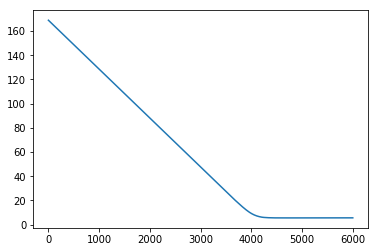

In [20]:
plt.plot(list(range(iteration_num)),losses)

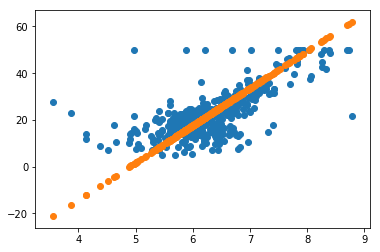

In [21]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

平方loss 是按指数级下降； 绝对值loss是线性下降  
平方loss收敛更快